In [1]:
# Importo le librerie 
import matplotlib.pyplot as plt
import numpy as np
import torch

# Imposta il seed per la riproducibilità
torch.manual_seed(0)

Definisco il background, cioè la funzione generatrice dei dati e i target reali (ground truth)

In [17]:
# Ground Truth Function
def f(x):
    return 3 * x + 2 

# Generazione dei dati
def data_generator():
    x = torch.linspace(-2, 2, 200)  # Crea 200 punti tra -2 e 2
    noise = torch.randn_like(x)     # Aggiunge rumore casuale
    y = f(x) + noise                # Dati con rumore
    return x, y

Stampo quello che ho creato

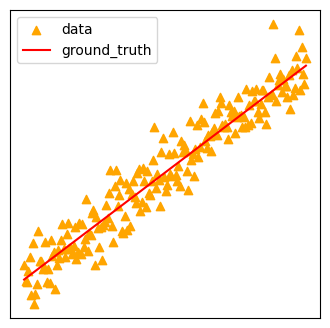

In [25]:
x,y = data_generator()
fig, ax = plt.subplots(figsize = (4,4))
ax.set_xticks([])
ax.set_yticks([])
plt.scatter(x,y,marker='^',color = 'orange',label = 'data')
plt.plot(x,f(x),color = 'red',label = 'ground_truth')
plt.legend()
plt.show()


In [26]:
# Modello Lineare con PyTorch
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.tensor([5.0]))  # Inizializza w
        self.b = torch.nn.Parameter(torch.tensor([0.0]))  # Inizializza b

    def forward(self, x):
        return self.w * x + self.b

In [27]:
# Funzione di Loss (MSE)
def loss(y_ex, y_pred):
    return torch.mean((y_ex - y_pred) ** 2)

In [28]:
def train(model, x, y, learning_rate):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer.zero_grad()  # Reset dei gradienti
    y_pred = model(x)      # Predizione del modello
    l = loss(y, y_pred)    # Calcolo della loss
    l.backward()           # Calcolo dei gradienti
    optimizer.step()       # Aggiornamento dei pesi

In [29]:
# Ciclo di addestramento
def training_loop(model, x, y, epochs, learning_rate=0.01):
    weights = []
    biases = []
    loss_history = []

    for epoch in range(epochs):
        train(model, x, y, learning_rate)
        weights.append(model.w.item())
        biases.append(model.b.item())
        loss_history.append(loss(y, model(x)).item())

    return loss_history

In [30]:
# Crea il modello
model = Model()
y_untrained = model(x).detach()

# Addestramento del modello
epochs = 10
loss_history = training_loop(model, x, y, epochs)

# Predizioni con il modello addestrato
ypred = model(x).detach()

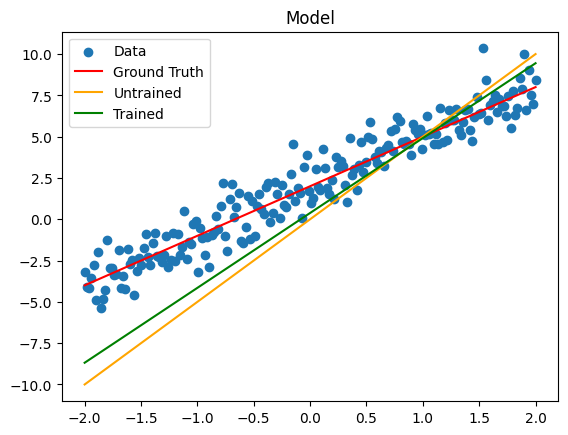

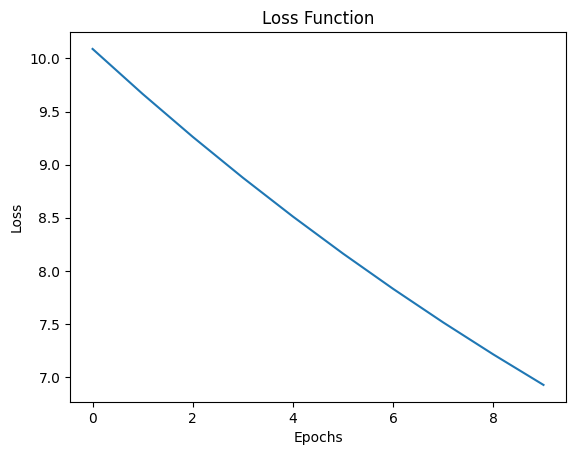

In [31]:
# Grafico del modello
plt.figure()
plt.title('Model')
plt.scatter(x, y, label='Data')
plt.plot(x, f(x), color="red", label='Ground Truth')
plt.plot(x, y_untrained, color="orange", label='Untrained')
plt.plot(x, ypred, color="green", label='Trained')
plt.legend()
plt.show()

# Grafico della loss function
plt.figure()
plt.title('Loss Function')
plt.plot(range(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [9]:
dir(ax.xaxis)

['OFFSETTEXTPAD',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_autolabelpos',
 '_autoscale_on',
 '_axes',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_copy_tick_props',
 '_different_canvas',
 '_format_with_dict',
 '_fully_clipped_to_axes',
 '_get_autoscale_on',
 '_get_axis_name',
 '_get_shared_axes',
 '_get_shared_axis',
 '_get_tick',
 '_get_tick_boxes_siblings',
 '_get_tick_label_size',
 '_get_ticklabel_bboxes',
 '_get_ticks_position',
 '_gid',
 '_in_layout',
 '_init',
 '_internal_update',
 '_label',
 '_major_tick_kw',
 '_minor_tick_kw',
 '_mouseove